In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
dataset=pd.read_csv(r"D:\Different Data\Machine Learning\Angrew\Linear Regression\Multiple Linear regression\smartwatches.csv")
dataset.head(2)

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g


In [47]:
dataset.shape

(450, 15)

In [48]:
dataset.isnull().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [50]:
dataset.drop_duplicates(inplace=True)

In [51]:
dataset.head(2)

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g


In [52]:
dataset.shape

(440, 15)

In [53]:
dataset.dtypes

Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [54]:
for column in dataset.columns:
    if dataset[column].dtype == "float64":  # Add colon at the end of the if condition
        dataset[column].fillna(dataset[column].mean(), inplace=True)  # Add inplace=True

    else:  # Use else instead of elif since it's covering all non-numeric cases
        dataset[column].fillna(dataset[column].mode()[0], inplace=True)  # Add inplace=True


C:\Users\Adnan Ameeni\AppData\Local\Temp\ipykernel_4200\4066336676.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].mode()[0], inplace=True)  # Add inplace=True
C:\Users\Adnan Ameeni\AppData\Local\Temp\ipykernel_4200\4066336676.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [55]:
dataset.isnull().sum()

Brand                  0
Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Model Name             0
Dial Shape             0
Strap Color            0
Strap Material         0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
Weight                 0
dtype: int64

In [56]:
import pandas as pd

# List of columns that are currently object type
columns_to_convert = ['Bluetooth', 'Display Size', 'Weight', 'Brand', 'Model Name', 'Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen']

# Loop through each column
for column in columns_to_convert:
    # Try to convert to float if possible
    try:
        dataset[column] = dataset[column].astype('float64')
    except ValueError:
        # If conversion to float fails (because the column has non-numeric data), perform encoding
        dataset[column] = pd.factorize(dataset[column])[0]

# Now the dataset has numeric values for all columns


In [57]:
dataset.dtypes

Brand                    int64
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name               int64
Dial Shape               int64
Strap Color              int64
Strap Material           int64
Touchscreen              int64
Battery Life (Days)    float64
Bluetooth                int64
Display Size             int64
Weight                   int64
dtype: object

In [58]:
from sklearn.model_selection import train_test_split
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]

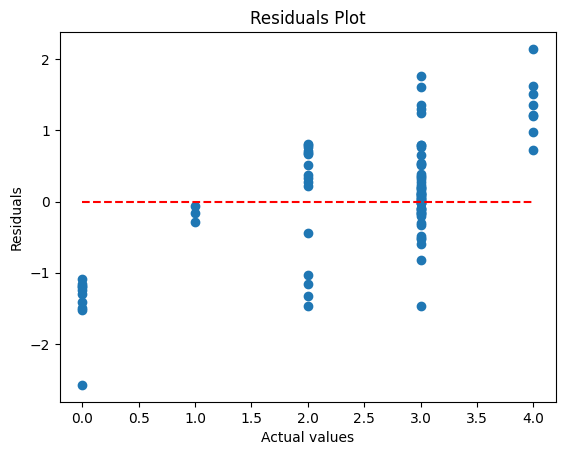

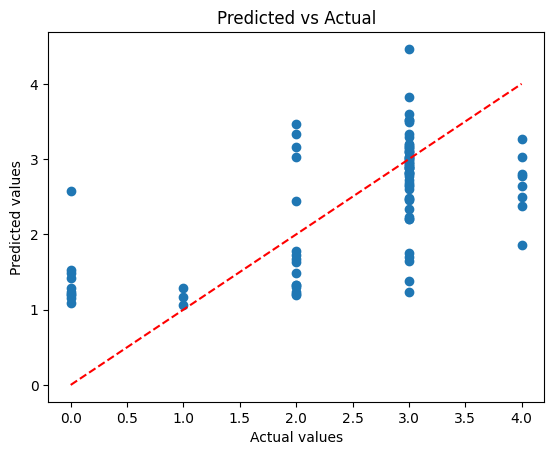

In [59]:
# Plot residuals
plt.scatter(y_test, y_test - y_pred)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='dashed')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual')
plt.show()


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()


In [62]:
model.fit(x_train,y_train)

LinearRegression()

In [63]:
model.score(x_train,y_train)

0.4184104975531957

In [64]:
model.score(x_test,y_test)

0.353964559343541

In [65]:
y_pred=model.predict(x_test)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (already available in model.score)
r2_train = model.score(x_train, y_train)
r2_test = model.score(x_test, y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared on Training set: {r2_train}")
print(f"R-squared on Test set: {r2_test}")


Mean Squared Error (MSE): 0.7634964298667243
Mean Absolute Error (MAE): 0.6646854704417291
R-squared on Training set: 0.4184104975531957
R-squared on Test set: 0.353964559343541


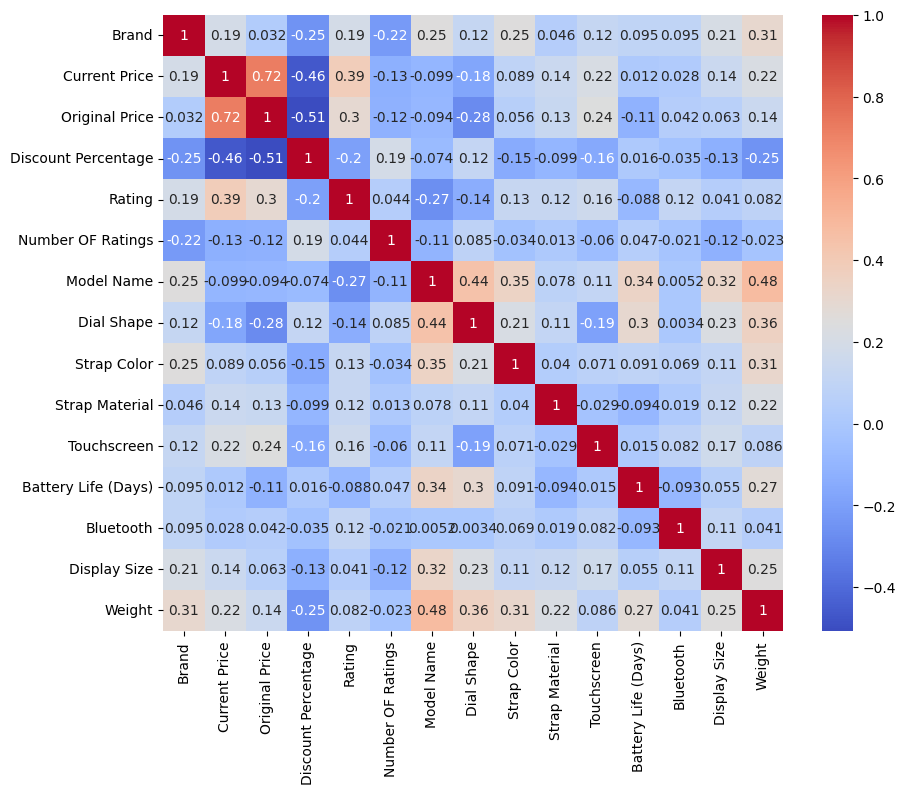

In [67]:
# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.show()
